In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

df_pref = pd.read_csv('../data/cleaning_pref.csv')
display(df_pref.head(3))



,name,point,pref,address,latitude,longitude,parking,holiday,mon_holiday,tue_holiday,wed_holiday,thu_holiday,fri_holiday,sat_holiday,sun_holiday
0,麺屋 彩未,96.711,北海道,〒062-0010 北海道札幌市豊平区美園十条5丁目3-12,43.035251,141.381909,駐車場あり,月曜、火曜水曜の夜、月2回不定休有,1,1,1,0,0,0,0
1,ラーメン二郎 札幌店,95.285,北海道,〒060-0806 北海道札幌市北区北六条西8-8-11,43.067395,141.343821,駐車場なし,日曜、祝日不定休,0,0,0,0,0,0,1
2,Japanese Ramen Noodle Lab Q,94.365,北海道,〒060-0001 北海道札幌市中央区北1条西2丁目1-3 りんどうビル B1F,43.063437,141.354229,駐車場なし,日曜日,0,0,0,0,0,0,1


,kind,name,point,address,latitude,longitude,parking,holiday,mon_holiday,tue_holiday,wed_holiday,thu_holiday,fri_holiday,sat_holiday,sun_holiday
0,ラーメン,麺屋吉左右,99.746,〒135-0016 東京都江東区東陽1-11-3,35.668468,139.810308,駐車場あり,水曜日・金曜日・日曜日,0,0,1,0,1,0,1
1,ラーメン,らぁ麺 飯田商店 湯河原本店,99.704,〒259-0303 神奈川県足柄下郡湯河原町土肥2丁目12-14,35.144696,139.109738,駐車場あり,火・水曜日\n※不定期月曜臨時休業あり。,1,1,1,0,0,0,0
2,ラーメン,ラーメン二郎 ひばりヶ丘駅前店,99.400,〒188-0001 東京都西東京市谷戸町3-27-24 ひばりヶ丘プラザ1F,35.749957,139.543549,駐車場あり,水曜夜の部\n日曜\n※祝日は不定休、営業有無は店内表示やTwitterで告知有り,0,0,1,0,0,0,1


## 都道府県ごとに駐車場有無の割合を可視化

In [111]:
# 都道府県、駐車場の属性ごとにグループ化、シリーズの作成
df_pref_eda_of_holiday = df_pref[['pref','parking']].groupby(['pref','parking']).size()
# データフレーム化。それぞれをcolumnsになるようインデックスをリセット
df_pref_eda_of_holiday = pd.DataFrame(df_pref_eda_of_holiday, columns=['count']).reset_index()
df_pref_eda_of_holiday.to_csv('../data/groupby_parking.csv', index=False)
df_pref_eda_of_holiday

,pref,parking,count
0,三重県,情報なし,5
1,三重県,駐車場あり,43
2,三重県,駐車場なし,2
3,京都府,情報なし,2
4,京都府,駐車場あり,33
...,...,...,...
125,鳥取県,駐車場あり,42
126,鳥取県,駐車場なし,6
127,鹿児島県,情報なし,9
128,鹿児島県,駐車場あり,29


,pref,parking,count
0,三重県,情報なし,5
1,三重県,駐車場あり,43
2,三重県,駐車場なし,2


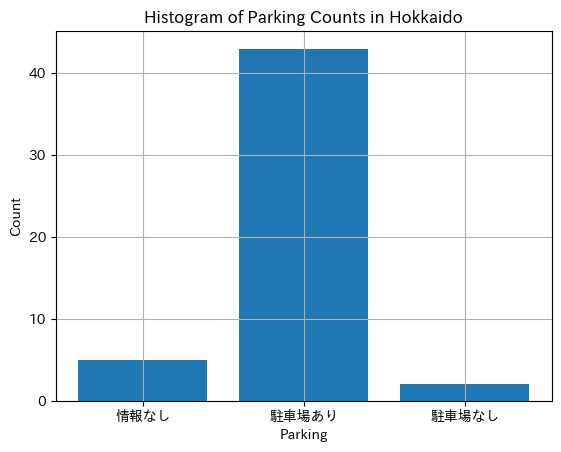

In [108]:
df_pref_eda_of_holiday = df_pref_eda_of_holiday.query("pref == '三重県'")
display(df_pref_eda_of_holiday)

# ヒストグラムの描画
plt.bar(df_pref_eda_of_holiday['parking'], df_pref_eda_of_holiday['count'])
plt.xlabel('Parking')
plt.ylabel('Count')
plt.title('Histogram of Parking Counts in Hokkaido')
plt.grid()
plt.show()

## 

In [115]:
df_kind = pd.read_csv('../data/cleaning_kind_of_rank.csv')

# df_kindに新しい列 'pref' を追加し、check_pref_in_address関数を適用
def check_pref_in_address(address):
  for prefecture in np.unique(df_pref['pref'].values):
    if prefecture in address:
      return prefecture
  return None

df_kind['pref'] = df_kind['address'].apply(check_pref_in_address)

df_kind.to_csv('../data/cleaning_kind_of_rank.csv', index=False)

In [119]:
df_kind_new = df_kind[['kind','pref']].groupby(['kind','pref']).size()
df_kind_new = pd.DataFrame(df_kind_new, columns=['count']).reset_index()
df_kind_new.to_csv('../data/groupby_kind.csv',index=False)